In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt


mushrooms = pd.read_csv('mushrooms.csv')

In [2]:
#Identify categorical data as Dtype object through pandas.info()
print(mushrooms.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
#Check for null values
print(mushrooms.isnull().values.sum())

0


In [4]:
print(mushrooms['gill-spacing'].value_counts())

c    6812
w    1312
Name: gill-spacing, dtype: int64


In [5]:
#Make a copy of mushroom data
mushrooms_copy = mushrooms.copy()

In [6]:
#Replacing Values by hand
replacement_values = {'gill-spacing':{'c':1,'w':2}}
mushrooms_copy.replace(replacement_values, inplace =True)
mushrooms_copy.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,1,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,1,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,1,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,1,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,2,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
#Encoding labels
mushrooms_encoding = mushrooms_copy.copy()

#First cast column as category type
mushrooms_encoding['stalk-surface-above-ring'] = mushrooms_encoding['stalk-surface-above-ring'].astype('category')

#Then use cat.codes for labeling
mushrooms_encoding['stalk-surface-above-ring'] = mushrooms_encoding['stalk-surface-above-ring'].cat.codes

mushrooms_encoding.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,1,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,1,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,1,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,1,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,2,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
#One-hot encoding with pandas
mushrooms_onehot = mushrooms_encoding.copy()

#First cast column as category type
mushrooms_onehot['odor'] = mushrooms_onehot['odor'].astype('category')

#Then use get_dummies for labeling
mushrooms_onehot = pd.get_dummies(mushrooms_onehot, columns=['odor'], prefix = ['odor'])

mushrooms_onehot.head()

,class,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,habitat,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,p,x,s,n,t,f,1,n,k,e,...,u,0,0,0,0,0,0,1,0,0
1,e,x,s,y,t,f,1,b,k,e,...,g,1,0,0,0,0,0,0,0,0
2,e,b,s,w,t,f,1,b,n,e,...,m,0,0,0,1,0,0,0,0,0
3,p,x,y,w,t,f,1,n,n,e,...,u,0,0,0,0,0,0,1,0,0
4,e,x,s,g,f,f,2,b,k,t,...,g,0,0,0,0,0,1,0,0,0


In [9]:
#Binary encoding using category_encoders
mushrooms_binary = mushrooms_onehot.copy()

#First you will have to install category_encoders
'''Go to your Terminal and use pip install category_encoders'''
#Now you will be able too import them into your notebook
import category_encoders as ce

#Finally you are able too encode the specified columns
encoder = ce.BinaryEncoder(cols=['gill-color'])
mushrooms_binary = encoder.fit_transform(mushrooms_binary)

mushrooms_binary.head()


C:\Users\Noah Breuer\.conda\envs\MachineLearning\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,class,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color_0,gill-color_1,...,habitat,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,p,x,s,n,t,f,1,n,0,0,...,u,0,0,0,0,0,0,1,0,0
1,e,x,s,y,t,f,1,b,0,0,...,g,1,0,0,0,0,0,0,0,0
2,e,b,s,w,t,f,1,b,0,0,...,m,0,0,0,1,0,0,0,0,0
3,p,x,y,w,t,f,1,n,0,0,...,u,0,0,0,0,0,0,1,0,0
4,e,x,s,g,f,f,2,b,0,0,...,g,0,0,0,0,0,1,0,0,0


In [10]:
#Frequency encoding using category_encoders
mushrooms_binary['habitat'] = mushrooms_binary['habitat'].astype('category')

#Calculate the frequency of each value
fe = mushrooms_binary.groupby('habitat').size()/len(mushrooms_binary)
print(fe)

#Now cast the calculated frequencies for each value in your coloumn 
mushrooms_binary.loc[:,'habitat'] = mushrooms_binary['habitat'].map(fe)

mushrooms_binary.head()

habitat
d    0.387494
g    0.264402
l    0.102413
m    0.035943
p    0.140817
u    0.045298
w    0.023634
dtype: float64


,class,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color_0,gill-color_1,...,habitat,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,p,x,s,n,t,f,1,n,0,0,...,0.045298,0,0,0,0,0,0,1,0,0
1,e,x,s,y,t,f,1,b,0,0,...,0.264402,1,0,0,0,0,0,0,0,0
2,e,b,s,w,t,f,1,b,0,0,...,0.035943,0,0,0,1,0,0,0,0,0
3,p,x,y,w,t,f,1,n,0,0,...,0.045298,0,0,0,0,0,0,1,0,0
4,e,x,s,g,f,f,2,b,0,0,...,0.264402,0,0,0,0,0,1,0,0,0


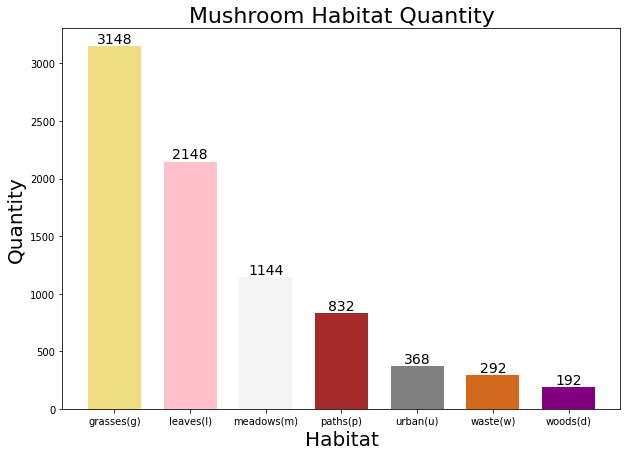

In [11]:
#Display frequencies of mushrooms per habitat
habitat = mushrooms['habitat'].value_counts()
m_height = habitat.values.tolist() #Provides numerical values
habitat.axes #Provides row labels
habitat_labels = habitat.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(7)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#f0dc82','#ffc0cb','#f5f5f5','#a52a2a','#808080','#d2691e','#800080','#000000','#ff0000','#ffff00','#ffa500','#008000']
#FFFFF0
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Habitat",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Habitat Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('grasses(g)','leaves(l)','meadows(m)','paths(p)','urban(u)','waste(w)','woods(d)'),
                  fontsize = 10)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() #Display bars. 

In [12]:
#Prepare Dataset

def mushrooms_prepare(mushrooms):
    mushrooms_prepared = mushrooms.copy()

    #Define y values
    replacement_values = {'class':{'p':1,'e':0}}
    mushrooms_prepared.replace(replacement_values, inplace =True)
    y=mushrooms_prepared['class']
    mushrooms_prepared.pop('class')


    #First cast column as category type
    mushrooms_prepared['cap-shape'] = mushrooms_prepared['cap-shape'].astype('category')
    mushrooms_prepared['cap-surface'] = mushrooms_prepared['cap-surface'].astype('category')
    mushrooms_prepared['cap-color'] = mushrooms_prepared['cap-color'].astype('category')
    mushrooms_prepared['bruises'] = mushrooms_prepared['bruises'].astype('category')
    mushrooms_prepared['odor'] = mushrooms_prepared['odor'].astype('category')
    mushrooms_prepared['gill-attachment'] = mushrooms_prepared['gill-attachment'].astype('category')
    mushrooms_prepared['gill-spacing'] = mushrooms_prepared['gill-spacing'].astype('category')
    mushrooms_prepared['gill-size'] = mushrooms_prepared['gill-size'].astype('category')
    mushrooms_prepared['gill-color'] = mushrooms_prepared['gill-color'].astype('category')
    mushrooms_prepared['stalk-shape'] = mushrooms_prepared['stalk-shape'].astype('category')
    mushrooms_prepared['stalk-root'] = mushrooms_prepared['stalk-root'].astype('category')
    mushrooms_prepared['stalk-surface-above-ring'] = mushrooms_prepared['stalk-surface-above-ring'].astype('category')
    mushrooms_prepared['stalk-surface-below-ring'] = mushrooms_prepared['stalk-surface-below-ring'].astype('category')
    mushrooms_prepared['stalk-color-above-ring'] = mushrooms_prepared['stalk-color-above-ring'].astype('category')
    mushrooms_prepared['stalk-color-below-ring'] = mushrooms_prepared['stalk-color-below-ring'].astype('category')
    mushrooms_prepared['veil-type'] = mushrooms_prepared['veil-type'].astype('category')
    mushrooms_prepared['veil-color'] = mushrooms_prepared['veil-color'].astype('category')
    mushrooms_prepared['ring-number'] = mushrooms_prepared['ring-number'].astype('category')
    mushrooms_prepared['ring-type'] = mushrooms_prepared['ring-type'].astype('category')
    mushrooms_prepared['spore-print-color'] = mushrooms_prepared['spore-print-color'].astype('category')
    mushrooms_prepared['population'] = mushrooms_prepared['population'].astype('category')
    mushrooms_prepared['habitat'] = mushrooms_prepared['habitat'].astype('category')

    return y,mushrooms_prepared

In [13]:
#Smaller Dataset
#Too test accuracy a smaller amount of attributes is needed otherwise - accuracy 100%
def mushrooms_smallerset(mushrooms_prepared):
    mushrooms_prepared.pop('cap-shape')
    mushrooms_prepared.pop('cap-surface')
    mushrooms_prepared.pop('bruises')
    mushrooms_prepared.pop('gill-attachment')
    mushrooms_prepared.pop('gill-spacing')
    mushrooms_prepared.pop('gill-size')
    mushrooms_prepared.pop('gill-color')
    mushrooms_prepared.pop('stalk-shape')
    mushrooms_prepared.pop('stalk-root')
    mushrooms_prepared.pop('stalk-surface-above-ring')
    mushrooms_prepared.pop('stalk-surface-below-ring')
    mushrooms_prepared.pop('stalk-color-above-ring')
    mushrooms_prepared.pop('stalk-color-below-ring')
    mushrooms_prepared.pop('veil-type')
    mushrooms_prepared.pop('veil-color')
    mushrooms_prepared.pop('ring-number')
    mushrooms_prepared.pop('ring-type')
    mushrooms_prepared.pop('spore-print-color')
    print(mushrooms_prepared)
    return mushrooms_prepared

In [14]:
#Encoding labels

mushrooms_prepared['cap-color'] = mushrooms_prepared['cap-color'].cat.codes
mushrooms_prepared['odor'] = mushrooms_prepared['odor'].cat.codes
mushrooms_prepared['population'] = mushrooms_prepared['population'].cat.codes
mushrooms_prepared['habitat'] = mushrooms_prepared['habitat'].cat.codes

mushrooms_prepared['cap-shape'] = mushrooms_prepared['cap-shape'].cat.codes
mushrooms_prepared['cap-surface'] = mushrooms_prepared['cap-surface'].cat.codes
mushrooms_prepared['bruises'] = mushrooms_prepared['bruises'].cat.codes
mushrooms_prepared['gill-attachment'] = mushrooms_prepared['gill-attachment'].cat.codes
mushrooms_prepared['gill-spacing'] = mushrooms_prepared['gill-spacing'].cat.codes
mushrooms_prepared['gill-size'] = mushrooms_prepared['gill-size'].cat.codes
mushrooms_prepared['gill-color'] = mushrooms_prepared['gill-color'].cat.codes
mushrooms_prepared['stalk-shape'] = mushrooms_prepared['stalk-shape'].cat.codes
mushrooms_prepared['stalk-root'] = mushrooms_prepared['stalk-root'].cat.codes
mushrooms_prepared['stalk-surface-above-ring'] = mushrooms_prepared['stalk-surface-above-ring'].cat.codes
mushrooms_prepared['stalk-surface-below-ring'] = mushrooms_prepared['stalk-surface-below-ring'].cat.codes
mushrooms_prepared['stalk-color-above-ring'] = mushrooms_prepared['stalk-color-above-ring'].cat.codes
mushrooms_prepared['stalk-color-below-ring'] = mushrooms_prepared['stalk-color-below-ring'].cat.codes
mushrooms_prepared['veil-type'] = mushrooms_prepared['veil-type'].cat.codes
mushrooms_prepared['veil-color'] = mushrooms_prepared['veil-color'].cat.codes
mushrooms_prepared['ring-number'] = mushrooms_prepared['ring-number'].cat.codes
mushrooms_prepared['ring-type'] = mushrooms_prepared['ring-type'].cat.codes
mushrooms_prepared['spore-print-color'] = mushrooms_prepared['spore-print-color'].cat.codes


mushrooms_prepared.head()

NameError: name 'mushrooms_prepared' is not defined

In [ ]:
#One hot encoding

mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['cap-color'], prefix = ['cap-color'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['odor'], prefix = ['odor'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['population'], prefix = ['population'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['habitat'], prefix = ['habitat'])

mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['cap-shape'], prefix = ['cap-shape'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['cap-surface'], prefix = ['cap-surface'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['bruises'], prefix = ['bruises'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['gill-attachment'], prefix = ['gill-attachment'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['gill-spacing'], prefix = ['gill-spacing'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['gill-size'], prefix = ['gill-size'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['gill-color'], prefix = ['gill-color'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['stalk-shape'], prefix = ['stalk-shape'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['stalk-root'], prefix = ['stalk-root'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['stalk-surface-above-ring'], prefix = ['stalk-surface-above-ring'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['stalk-surface-below-ring'], prefix = ['stalk-surface-below-ring'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['stalk-color-above-ring'], prefix = ['stalk-color-above-ring'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['stalk-color-below-ring'], prefix = ['stalk-color-below-ring'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['veil-type'], prefix = ['veil-type'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['veil-color'], prefix = ['veil-color'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['ring-number'], prefix = ['ring-number'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['ring-type'], prefix = ['ring-type'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['spore-print-color'], prefix = ['spore-print-color'])

In [ ]:
#Binary encoding
encoder = ce.BinaryEncoder(cols=['cap-color'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['odor'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['population'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['habitat'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)

encoder = ce.BinaryEncoder(cols=['cap-shape'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['cap-surface'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['bruises'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['gill-attachment'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['gill-spacing'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['gill-size'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['gill-color'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['stalk-shape'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['stalk-root'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['stalk-surface-above-ring'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['stalk-surface-below-ring'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['stalk-color-above-ring'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['stalk-color-below-ring'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['veil-type'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['veil-color'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['ring-number'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['ring-type'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['spore-print-color'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)


In [ ]:
#Frequency encoding only

fe = mushrooms_prepared.groupby('habitat').size()/len(mushrooms_prepared)
mushrooms_prepared.loc[:,'habitat'] = mushrooms_prepared['habitat'].map(fe)

In [ ]:
#Optimal Encode


#Replacing Labels
replacement_values = {'gill-size':{'b':2,'n':1}}
mushrooms_prepared.replace(replacement_values, inplace =True)
replacement_values = {'gill-spacing':{'c':1,'w':2}}
mushrooms_prepared.replace(replacement_values, inplace =True)
replacement_values = {'population':{'y':0,'s':2,'v':3,'n':4,'c':5,'a':6}}
mushrooms_prepared.replace(replacement_values, inplace =True)
replacement_values = {'ring-number':{'n':0,'o':1,'t':2}}
mushrooms_prepared.replace(replacement_values, inplace =True)

#Encoding Labels
mushrooms_prepared['cap-surface'] = mushrooms_prepared['cap-surface'].cat.codes
mushrooms_prepared['bruises'] = mushrooms_prepared['bruises'].cat.codes
mushrooms_prepared['gill-attachment'] = mushrooms_prepared['gill-attachment'].cat.codes
mushrooms_prepared['stalk-shape'] = mushrooms_prepared['stalk-shape'].cat.codes
mushrooms_prepared['stalk-surface-above-ring'] = mushrooms_prepared['stalk-surface-above-ring'].cat.codes
mushrooms_prepared['stalk-surface-below-ring'] = mushrooms_prepared['stalk-surface-below-ring'].cat.codes
mushrooms_prepared['veil-type'] = mushrooms_prepared['veil-type'].cat.codes
mushrooms_prepared['veil-color'] = mushrooms_prepared['veil-color'].cat.codes

#One Hot
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['cap-shape'], prefix = ['cap-shape'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['stalk-root'], prefix = ['stalk-root'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['odor'], prefix = ['odor'])
mushrooms_prepared = pd.get_dummies(mushrooms_prepared, columns=['ring-type'], prefix = ['ring-type'])

#Binary Encoding

encoder = ce.BinaryEncoder(cols=['gill-color'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['cap-color'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['stalk-color-above-ring'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['stalk-color-below-ring'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)
encoder = ce.BinaryEncoder(cols=['spore-print-color'])
mushrooms_prepared = encoder.fit_transform(mushrooms_prepared)

#Frequency
fe = mushrooms_prepared.groupby('habitat').size()/len(mushrooms_prepared)
mushrooms_prepared.loc[:,'habitat'] = mushrooms_prepared['habitat'].map(fe)


In [ ]:
#Prepare Dataset
y, mushrooms_prepared =mushrooms_prepare(mushrooms)


In [ ]:
mushrooms_prepared = mushrooms_smallerset(mushrooms)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mushrooms_prepared, y, test_size=0.95, random_state=42)

# As a sanity check of loading the dataset, we print out the size of the training and test data.

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


In [ ]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
print('R2',classifier.score(X_train,y_train))
y_pred = classifier.predict(X_test)

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
lr.fit(X_train,y_train)
print('R2',lr.score(X_train,y_train))
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, confusion_matrix,recall_score
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))